In [1]:
import pandas as pd
import json
import re
import csv
import numpy as np
import math
import codecs
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load Data

In [49]:
df = pd.read_csv('data/out_test.csv')
len(df)

10778

In [50]:
#documents without subject labels
df['subjects'].isna().sum()

3476

In [51]:
df.dropna(subset=['subjects'], inplace=True)
df['subjects'].isna().sum()

0

In [52]:
df['subjects']

0                       Deutsches Literaturarchiv Marbach
1          Burckhardt, Jacob|Deutschland|Historienmalerei
2                     Geschichtsstudium|Burckhardt, Jacob
3                             Fitzcarraldo|Herzog, Werner
4                                       Rauzzini, Filippo
                               ...                       
10768                                San Torpè|Kirchengut
10769                 Christine (Schweden, Königin)|Musik
10770                                    Hypsipyle|Mythos
10772    Chaucer, Geoffrey|Rezeption|Christine (de Pisan)
10773             Winckelmann, Johann Joachim|Archäologie
Name: subjects, Length: 7302, dtype: object

## Category labels

In [53]:
#based on the subject types
df['subject_labels'] = df['subject_types'].str.split('|')

In [54]:
df['subject_labels']

0              [b]
1        [p, g, s]
2           [s, p]
3           [u, p]
4              [p]
           ...    
10768       [g, s]
10769       [p, s]
10770       [p, s]
10772    [u, s, p]
10773       [p, s]
Name: subject_labels, Length: 7302, dtype: object

## Tokenize

In [55]:
# cleaning up the subject: getting rid of commas and spaces, replacing the | with spaces
df['subject_list'] = df['subjects'].apply(lambda x: str(x).replace(',', '').replace(' ', '').replace('|', ' '))

In [56]:
df['subject_list']

0                     DeutschesLiteraturarchivMarbach
1        BurckhardtJacob Deutschland Historienmalerei
2                   Geschichtsstudium BurckhardtJacob
3                           Fitzcarraldo HerzogWerner
4                                     RauzziniFilippo
                             ...                     
10768                             SanTorpè Kirchengut
10769                Christine(SchwedenKönigin) Musik
10770                                Hypsipyle Mythos
10772    ChaucerGeoffrey Rezeption Christine(dePisan)
10773            WinckelmannJohannJoachim Archäologie
Name: subject_list, Length: 7302, dtype: object

## Bag of words

In [67]:
vectorizer = CountVectorizer(min_df=5)
subject_doc_matrix = vectorizer.fit_transform(df.subject_list)

In [68]:
subject_doc_matrix

<7302x429 sparse matrix of type '<class 'numpy.int64'>'
	with 7762 stored elements in Compressed Sparse Row format>

### UMAP

In [69]:
import matplotlib.pyplot as plt
from umap.umap_ import UMAP
import umap.plot

In [70]:
reducer = UMAP(n_components = 2, metric='hellinger')

embedding = reducer.fit(subject_doc_matrix)

c:\Users\hanna\anaconda3\envs\ada\lib\site-packages\umap\umap_.py:132: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = 1 has removed 24217 edges.
It has fully disconnected 1141 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


In [71]:
embedding.embedding_.shape

(7302, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


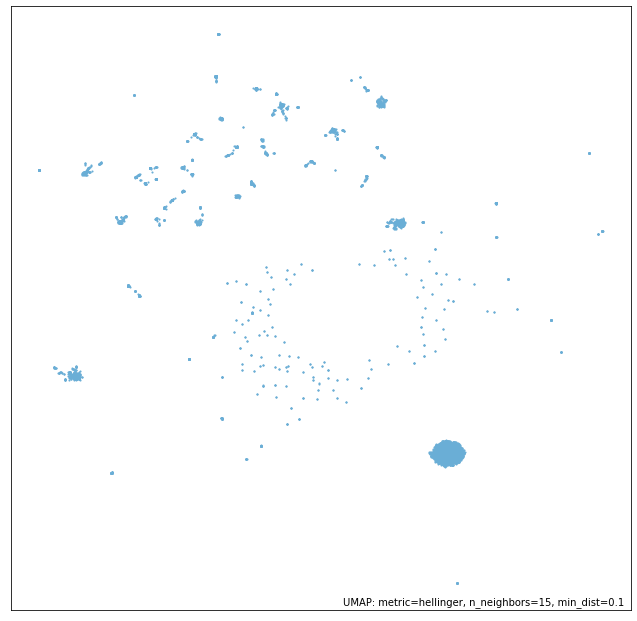

In [72]:
f = umap.plot.points(embedding)

## TF-IDF

In [73]:
tfidf = TfidfVectorizer(min_df=5)
tfidf_subject_matrix = tfidf.fit_transform(df.subject_list)


In [74]:
tfidf_subject_matrix

<7302x429 sparse matrix of type '<class 'numpy.float64'>'
	with 7762 stored elements in Compressed Sparse Row format>

In [75]:
tfidf_embedding = UMAP( n_components = 2, metric='hellinger').fit(tfidf_subject_matrix)


c:\Users\hanna\anaconda3\envs\ada\lib\site-packages\umap\umap_.py:132: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = 1 has removed 25321 edges.
It has fully disconnected 1189 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


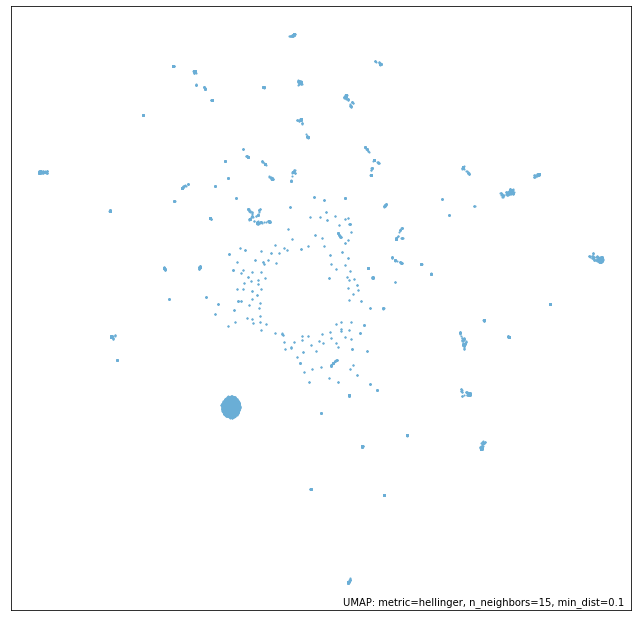

In [76]:
f = umap.plot.points(tfidf_embedding)